In [26]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths


from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [93]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [27]:
dataset=r'C:\Users\abhay\workspace\dataset\data'
imagePaths=list(paths.list_images(dataset))

In [28]:
imagePaths

['C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_10.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_100.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1000.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1001.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1002.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1003.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1004.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1005.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1006.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1007.jpg',
 'C:\\Users\\abhay\\workspace\\dataset\\data\\without_mask\\without_mask_1008.jpg'

In [29]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

C:\Users\abhay\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [30]:
data[1]

array([[[ 0.58431375,  0.52156866,  0.62352943],
        [ 0.5529412 ,  0.4901961 ,  0.5764706 ],
        [ 0.5529412 ,  0.4901961 ,  0.5764706 ],
        ...,
        [ 0.5372549 ,  0.52156866,  0.54509807],
        [ 0.5372549 ,  0.52156866,  0.54509807],
        [ 0.5529412 ,  0.5372549 ,  0.56078434]],

       [[ 0.58431375,  0.52156866,  0.62352943],
        [ 0.5529412 ,  0.4901961 ,  0.5764706 ],
        [ 0.5529412 ,  0.4901961 ,  0.5764706 ],
        ...,
        [ 0.5372549 ,  0.52156866,  0.54509807],
        [ 0.5372549 ,  0.52156866,  0.54509807],
        [ 0.5529412 ,  0.5372549 ,  0.56078434]],

       [[ 0.58431375,  0.52156866,  0.62352943],
        [ 0.58431375,  0.52156866,  0.62352943],
        [ 0.58431375,  0.52156866,  0.62352943],
        ...,
        [ 0.5529412 ,  0.5372549 ,  0.56078434],
        [ 0.5529412 ,  0.5372549 ,  0.56078434],
        [ 0.58431375,  0.5686275 ,  0.5921569 ]],

       ...,

       [[-0.1372549 , -0.18431371,  0.03529418],
        [ 0

In [31]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [32]:
categories=os.listdir(dataset)
categories 

['without_mask', 'with_mask']

In [33]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [34]:
data.shape

(7553, 224, 224, 3)

In [35]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [36]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [37]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [39]:
train_X.shape

(6042, 224, 224, 3)

In [40]:
train_Y.shape

(6042, 2)

In [41]:
test_X.shape

(1511, 224, 224, 3)

In [42]:
test_Y.shape

(1511, 2)

In [43]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [44]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [45]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [46]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [47]:
for layer in baseModel.layers:
    layer.trainable=False

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

block_12_project (Conv2D)       (None, 14, 14, 96)   55296       block_12_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_12_project_BN (BatchNorma (None, 14, 14, 96)   384         block_12_project[0][0]           
__________________________________________________________________________________________________
block_12_add (Add)              (None, 14, 14, 96)   0           block_11_add[0][0]               
                                                                 block_12_project_BN[0][0]        
__________________________________________________________________________________________________
block_13_expand (Conv2D)        (None, 14, 14, 576)  55296       block_12_add[0][0]               
__________________________________________________________________________________________________
block_13_expand_BN (BatchNormal (None, 14, 14, 576)  2304        block_13_expand[0][0]            
__________

In [50]:
learning_rate=0.001
Epochs=20
BS=32

opt=Adam(learning_rate=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'C:\Users\abhay\workspace\face-mask-detection')

Epoch 1/20
188/188 [==============================] - 71s 361ms/step - loss: 0.1133 - accuracy: 0.9596 - val_loss: 0.0430 - val_accuracy: 0.9828
Epoch 2/20
188/188 [==============================] - 55s 290ms/step - loss: 0.0919 - accuracy: 0.9667
Epoch 3/20
188/188 [==============================] - 51s 272ms/step - loss: 0.0722 - accuracy: 0.9745
Epoch 4/20
188/188 [==============================] - 48s 255ms/step - loss: 0.0750 - accuracy: 0.9744
Epoch 5/20
188/188 [==============================] - 48s 255ms/step - loss: 0.0674 - accuracy: 0.9767
Epoch 6/20
188/188 [==============================] - 48s 253ms/step - loss: 0.0674 - accuracy: 0.9764
Epoch 7/20
188/188 [==============================] - 48s 254ms/step - loss: 0.0604 - accuracy: 0.9775
Epoch 8/20
188/188 [==============================] - 48s 254ms/step - loss: 0.0574 - accuracy: 0.9785
Epoch 9/20
188/188 [==============================] - 48s 253ms/step - loss: 0.0618 - accuracy: 0.9770
Epoch 10/20
188/188 [==========

C:\Users\abhay\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: C:\Users\abhay\workspace\face-mask-detection\assets


In [51]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.99       745
without_mask       0.99      0.98      0.99       766

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511



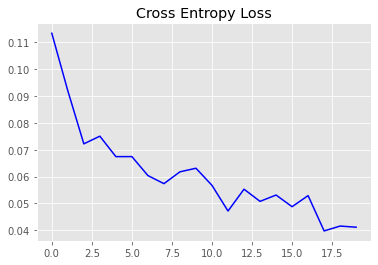

In [55]:
from matplotlib import pyplot
pyplot.title('Cross Entropy Loss')
pyplot.plot(H.history['loss'], color='blue', label='train')

# images

In [112]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

In [113]:
prototxtPath=os.path.sep.join([r'C:\Users\abhay\workspace\face-mask-detection','deploy.prototxt.txt'])
weightsPath=os.path.sep.join([r'C:\Users\abhay\workspace\face-mask-detection','res10_300x300_ssd_iter_140000.caffemodel'])

In [114]:
prototxtPath

'C:\\Users\\abhay\\workspace\\face-mask-detection\\deploy.prototxt.txt'

In [115]:
weightsPath

'C:\\Users\\abhay\\workspace\\face-mask-detection\\res10_300x300_ssd_iter_140000.caffemodel'

In [116]:
net=cv2.dnn.readNet(prototxtPath,weightsPath)

In [117]:
model=load_model(r'C:\Users\abhay\workspace\face-mask-detection')

In [151]:
image=cv2.imread(r'C:\Users\abhay\workspace\face-mask-detection\images.jpg')

In [152]:
image

array([[[122, 166, 165],
        [ 88, 128, 127],
        [161, 191, 192],
        ...,
        [213, 211, 203],
        [214, 208, 201],
        [212, 206, 199]],

       [[122, 166, 165],
        [ 88, 128, 127],
        [161, 191, 192],
        ...,
        [215, 212, 204],
        [214, 208, 201],
        [212, 206, 199]],

       [[122, 166, 165],
        [ 88, 128, 127],
        [161, 191, 192],
        ...,
        [216, 213, 205],
        [215, 209, 202],
        [213, 207, 200]],

       ...,

       [[ 20,  11,  54],
        [ 31,  24,  61],
        [ 38,  35,  61],
        ...,
        [ 38,  22,  15],
        [ 41,  27,  21],
        [ 27,  15,  11]],

       [[ 45,  36,  79],
        [ 28,  21,  58],
        [ 40,  37,  63],
        ...,
        [ 37,  21,  14],
        [ 41,  27,  21],
        [ 30,  18,  14]],

       [[106,  97, 140],
        [ 37,  30,  67],
        [ 36,  33,  59],
        ...,
        [ 37,  21,  14],
        [ 40,  26,  20],
        [ 34,  22,  18]]

In [153]:
image.shape

(180, 280, 3)

In [154]:
(h,w)=image.shape[:2]

In [155]:
(h,w)

(180, 280)

In [156]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))

In [157]:
blob

array([[[[  18.,  -13.,   45., ...,  109.,  110.,  108.],
         [  18.,  -13.,   45., ...,  110.,  110.,  108.],
         [  18.,  -13.,   45., ...,  111.,  110.,  108.],
         ...,
         [ -59.,  -74.,  -66., ...,  -66.,  -64.,  -74.],
         [ -23.,  -66.,  -67., ...,  -67.,  -65.,  -72.],
         [   2.,  -60.,  -68., ...,  -67.,  -65.,  -70.]],

        [[ -11.,  -45.,    3., ...,   33.,   31.,   29.],
         [ -11.,  -45.,    3., ...,   34.,   31.,   29.],
         [ -11.,  -45.,    4., ...,   34.,   31.,   29.],
         ...,
         [-141., -154., -143., ..., -155., -151., -159.],
         [-105., -146., -144., ..., -155., -151., -157.],
         [ -80., -140., -145., ..., -155., -152., -155.]],

        [[  42.,    8.,   58., ...,   80.,   78.,   76.],
         [  42.,    8.,   58., ...,   80.,   78.,   76.],
         [  42.,    8.,   58., ...,   81.,   78.,   76.],
         ...,
         [ -44.,  -63.,  -61., ..., -108., -103., -109.],
         [  -7.,  -54.,  -

In [158]:
blob.shape

(1, 3, 300, 300)

In [159]:

net.setInput(blob)
detections=net.forward()

In [160]:
detections

array([[[[0.        , 1.        , 0.99788994, ..., 0.5831886 ,
          0.42677256, 0.88303846],
         [0.        , 1.        , 0.9916965 , ..., 0.3537928 ,
          0.8363595 , 0.602855  ],
         [0.        , 1.        , 0.990249  , ..., 0.15405303,
          0.26524982, 0.3145767 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [166]:
#loop over the detections
%matplotlib inline
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    
    
    if confidence>0.5:
        #we need the X,Y coordinates
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        
        #ensure the bounding boxes fall within the dimensions of the frame
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
        
        #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face=cv2.resize(face,(224,224))
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (mask,withoutMask)=model.predict(face)[0]
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
cv2.imshow("OutPut",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# video

In [18]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
from imutils.video import VideoStream
import imutils
from IPython.display import Audio

In [19]:
def detect_and_predict_mask(frame,faceNet,maskNet):
    #grab the dimensions of the frame and then construct a blob
    (h,w)=frame.shape[:2]
    blob=cv2.dnn.blobFromImage(frame,1.0,(300,300),(104.0,177.0,123.0))
    
    
    faceNet.setInput(blob)
    detections=faceNet.forward()
    
    #initialize our list of faces, their corresponding locations and list of predictions
    
    faces=[]
    locs=[]
    preds=[]
    
    
    for i in range(0,detections.shape[2]):
        confidence=detections[0,0,i,2]
    
    
        if confidence>0.5:
        #we need the X,Y coordinates
            box=detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startX,startY,endX,endY)=box.astype('int')
        
            #ensure the bounding boxes fall within the dimensions of the frame
            (startX,startY)=(max(0,startX),max(0,startY))
            (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
            #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
            face=frame[startY:endY, startX:endX]
            face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
            face=cv2.resize(face,(224,224))
            face=img_to_array(face)
            face=preprocess_input(face)
        
            faces.append(face)
            locs.append((startX,startY,endX,endY))
        
        #only make a predictions if atleast one face was detected
        if len(faces)>0:
            faces=np.array(faces,dtype='float32')
            preds=maskNet.predict(faces,batch_size=12)
        
        return (locs,preds)

In [20]:
prototxtPath=os.path.sep.join([r'C:\Users\abhay\workspace\face-mask-detection','deploy.prototxt.txt'])
weightsPath=os.path.sep.join([r'C:\Users\abhay\workspace\face-mask-detection','res10_300x300_ssd_iter_140000.caffemodel'])

In [21]:

faceNet=cv2.dnn.readNet(prototxtPath,weightsPath)

In [22]:
maskNet=load_model(r'C:\Users\abhay\workspace\face-mask-detection')

## laptop camera

In [167]:
cap = cv2.VideoCapture(0)

while True:
    #grab the frame from the threaded video stream and resize it
    #to have a maximum width of 400 pixels
    status,frame=cap.read()
    frame=imutils.resize(frame,width=400)
    
    #detect faces in the frame and preict if they are waring masks or not
    (locs,preds)=detect_and_predict_mask(frame,faceNet,maskNet)
    
    #loop over the detected face locations and their corrosponding loactions
    
    for (box,pred) in zip(locs,preds):
        (startX,startY,endX,endY)=box
        (mask,withoutMask)=pred
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        if (color ==(0,0,255)):
            display(Audio(r'C:\Users\abhay\workspace\face-mask-detection\beep-02.mp3', autoplay=True)); 
        #display the label and bounding boxes
        cv2.putText(frame,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(frame,(startX,startY),(endX,endY),color,2)
        
        
    #show the output frame
    cv2.imshow("Frame",frame)
    if cv2.waitKey(10) == 13:
        
            break
        
cv2.destroyAllWindows()
cap.release()

## IP CAM

In [ ]:
cap = cv2.VideoCapture("https://192.168.1.2:8080/video")

while True:
    #grab the frame from the threaded video stream and resize it
    #to have a maximum width of 400 pixels
    status,frame=cap.read()
    frame=imutils.resize(frame,width=400)
    
    #detect faces in the frame and preict if they are waring masks or not
    (locs,preds)=detect_and_predict_mask(frame,faceNet,maskNet)
    
    #loop over the detected face locations and their corrosponding loactions
    
    for (box,pred) in zip(locs,preds):
        (startX,startY,endX,endY)=box
        (mask,withoutMask)=pred
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        if (color ==(0,0,255)):
            display(Audio(r'C:\Users\User\Desktop\dcc\beep-06.wav', autoplay=True)); 
        #display the label and bounding boxes
        cv2.putText(frame,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(frame,(startX,startY),(endX,endY),color,2)
        
        
    #show the output frame
    cv2.imshow("Frame",frame)
    if cv2.waitKey(10) == 13:
            break
        
cv2.destroyAllWindows()
cap.release()